In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#loading csv file
loan_details = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
#displaying first 10 rows of the csv
loan_details.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [4]:
#Shape of dataset and the info
print(loan_details.shape)
loan_details.info()

(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#searching for any missing values
loan_details.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#Five point summary
loan_details.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


***Few Insights:***

- ***Min professional experience is a negative value. This is invalid.***
- ***Mean and Median values of Income are different.***
- ***Income and Mortgage have high Standard Deviation.***

In [7]:
#Finding out all the values having negative years of professional experience
loan_details[loan_details.Experience<0].Experience.value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [8]:
#As the experience is less than 0, we can replace those values with 0
loan_details.loc[loan_details.Experience<0,'Experience']=0
#Checking if the values are replaced
loan_details[loan_details.Experience<0].Experience.value_counts()

Series([], Name: Experience, dtype: int64)

***Personal Loan, Securities Account, CD Account, Online and CreditCard are categorical values. But in the dataset, there are stored as integers. We can change the type of these features as 'Category'.***

In [9]:
loan_details[['Personal Loan','Securities Account','CD Account','Online','CreditCard']] = loan_details[['Personal Loan',
                                                                                                         'Securities Account',
                                                                                                         'CD Account',
                                                                                                         'Online',
                                                                                                         'CreditCard']].astype('category')

In [10]:
#Checking if the type has changed
loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(5), float64(1), int64(8)
memory usage: 376.6 KB


### Checking the distribution of Continuous features

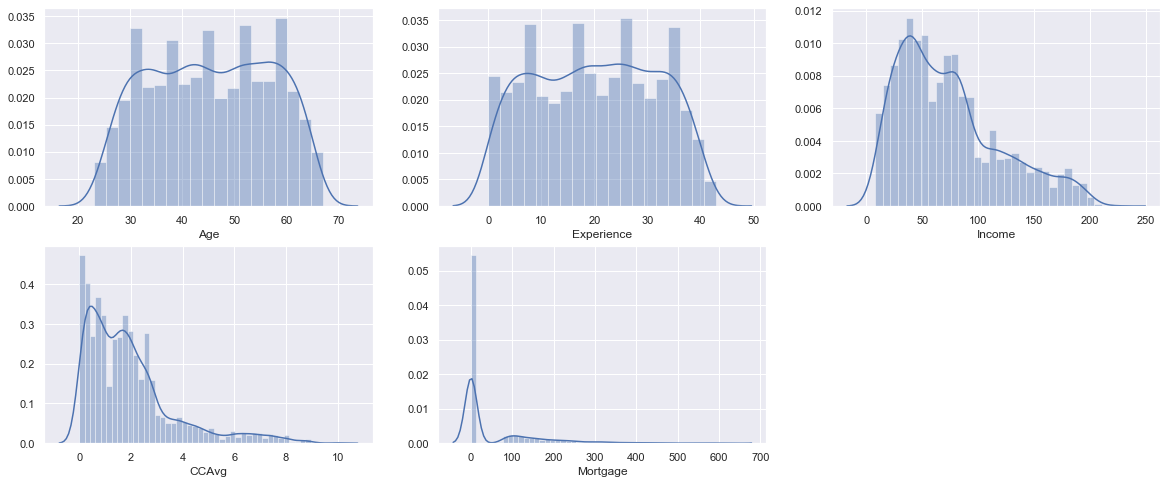

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
sns.distplot(loan_details['Age'], ax=axs[0,0]);
sns.distplot(loan_details['Experience'], ax=axs[0,1]);
sns.distplot(loan_details['Income'], ax=axs[0,2]);
sns.distplot(loan_details['CCAvg'], ax=axs[1,0]);
sns.distplot(loan_details['Mortgage'], ax=axs[1,1]);
fig.delaxes(axs[1,2])

***From the five point summary above, it can be seen that for Age and Experience columns the mean and median values are approximate. But the above plot shows the curve is not entirely bell shaped. Income, CCAvg and Mortgage are right skewed. Indicates the presence of outliers. Hence none of the above seem to be normally distributed.***

***Checking the presence of outliers using boxplots.***

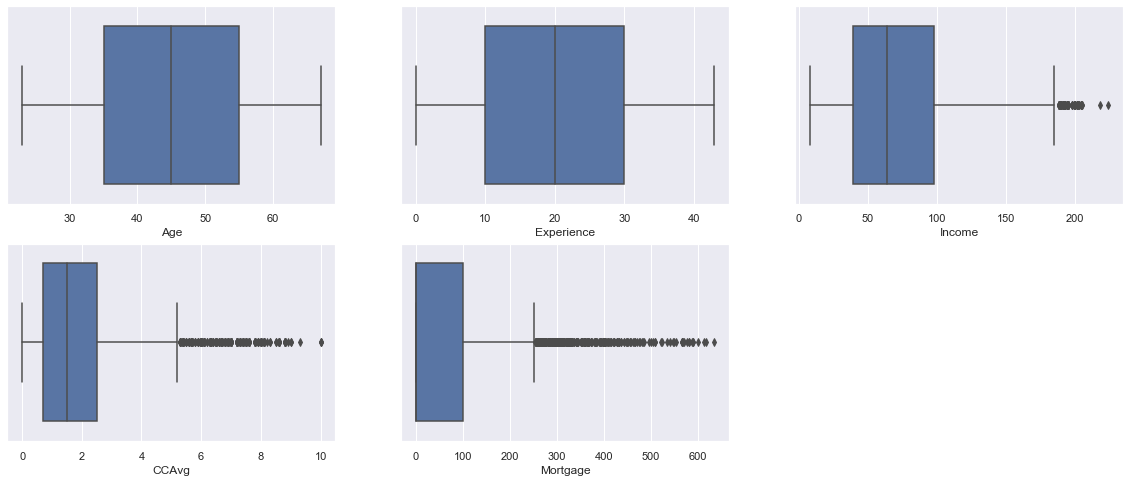

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
sns.boxplot(loan_details['Age'], ax=axs[0,0]);
sns.boxplot(loan_details['Experience'], ax=axs[0,1]);
sns.boxplot(loan_details['Income'], ax=axs[0,2]);
sns.boxplot(loan_details['CCAvg'], ax=axs[1,0]);
sns.boxplot(loan_details['Mortgage'], ax=axs[1,1]);
fig.delaxes(axs[1,2])

###  Checking the distribution of Categorical and Ordinal features

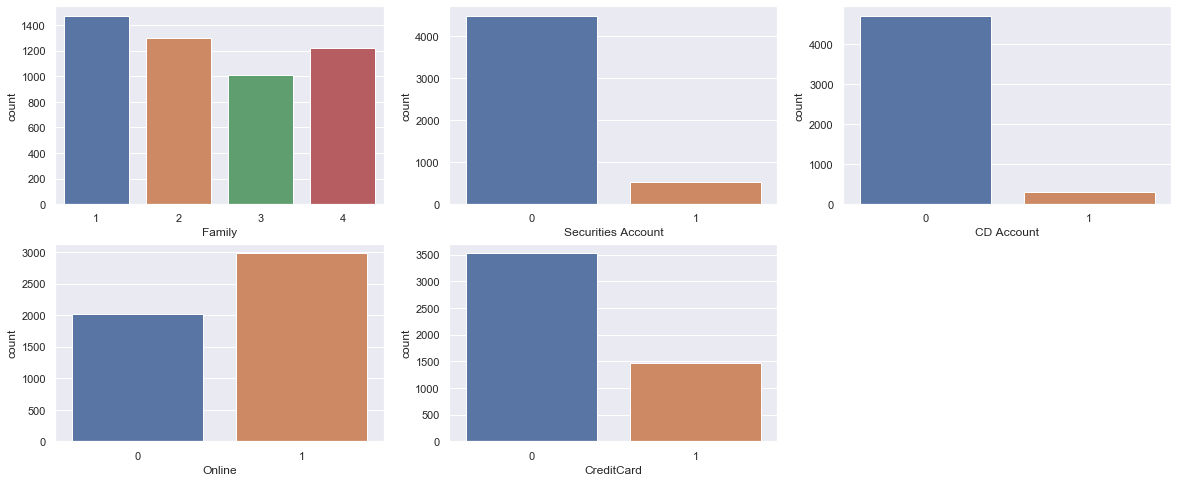

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
sns.countplot(loan_details['Family'], ax=axs[0,0]);
sns.countplot(loan_details['Securities Account'], ax=axs[0,1]);
sns.countplot(loan_details['CD Account'], ax=axs[0,2]);
sns.countplot(loan_details['Online'], ax=axs[1,0]);
sns.countplot(loan_details['CreditCard'], ax=axs[1,1]);
fig.delaxes(axs[1,2])

***Insights:***

- ***Very few people have Securities Account with the bank.***
- ***Very few people have CD Account with the bank.***
- ***Proportion of people using internet banking facilities is slightly higher than those who do not use.***
- ***Proportion of people using Credit Card is less than those who do not use.***

### Pair Plot Analysis

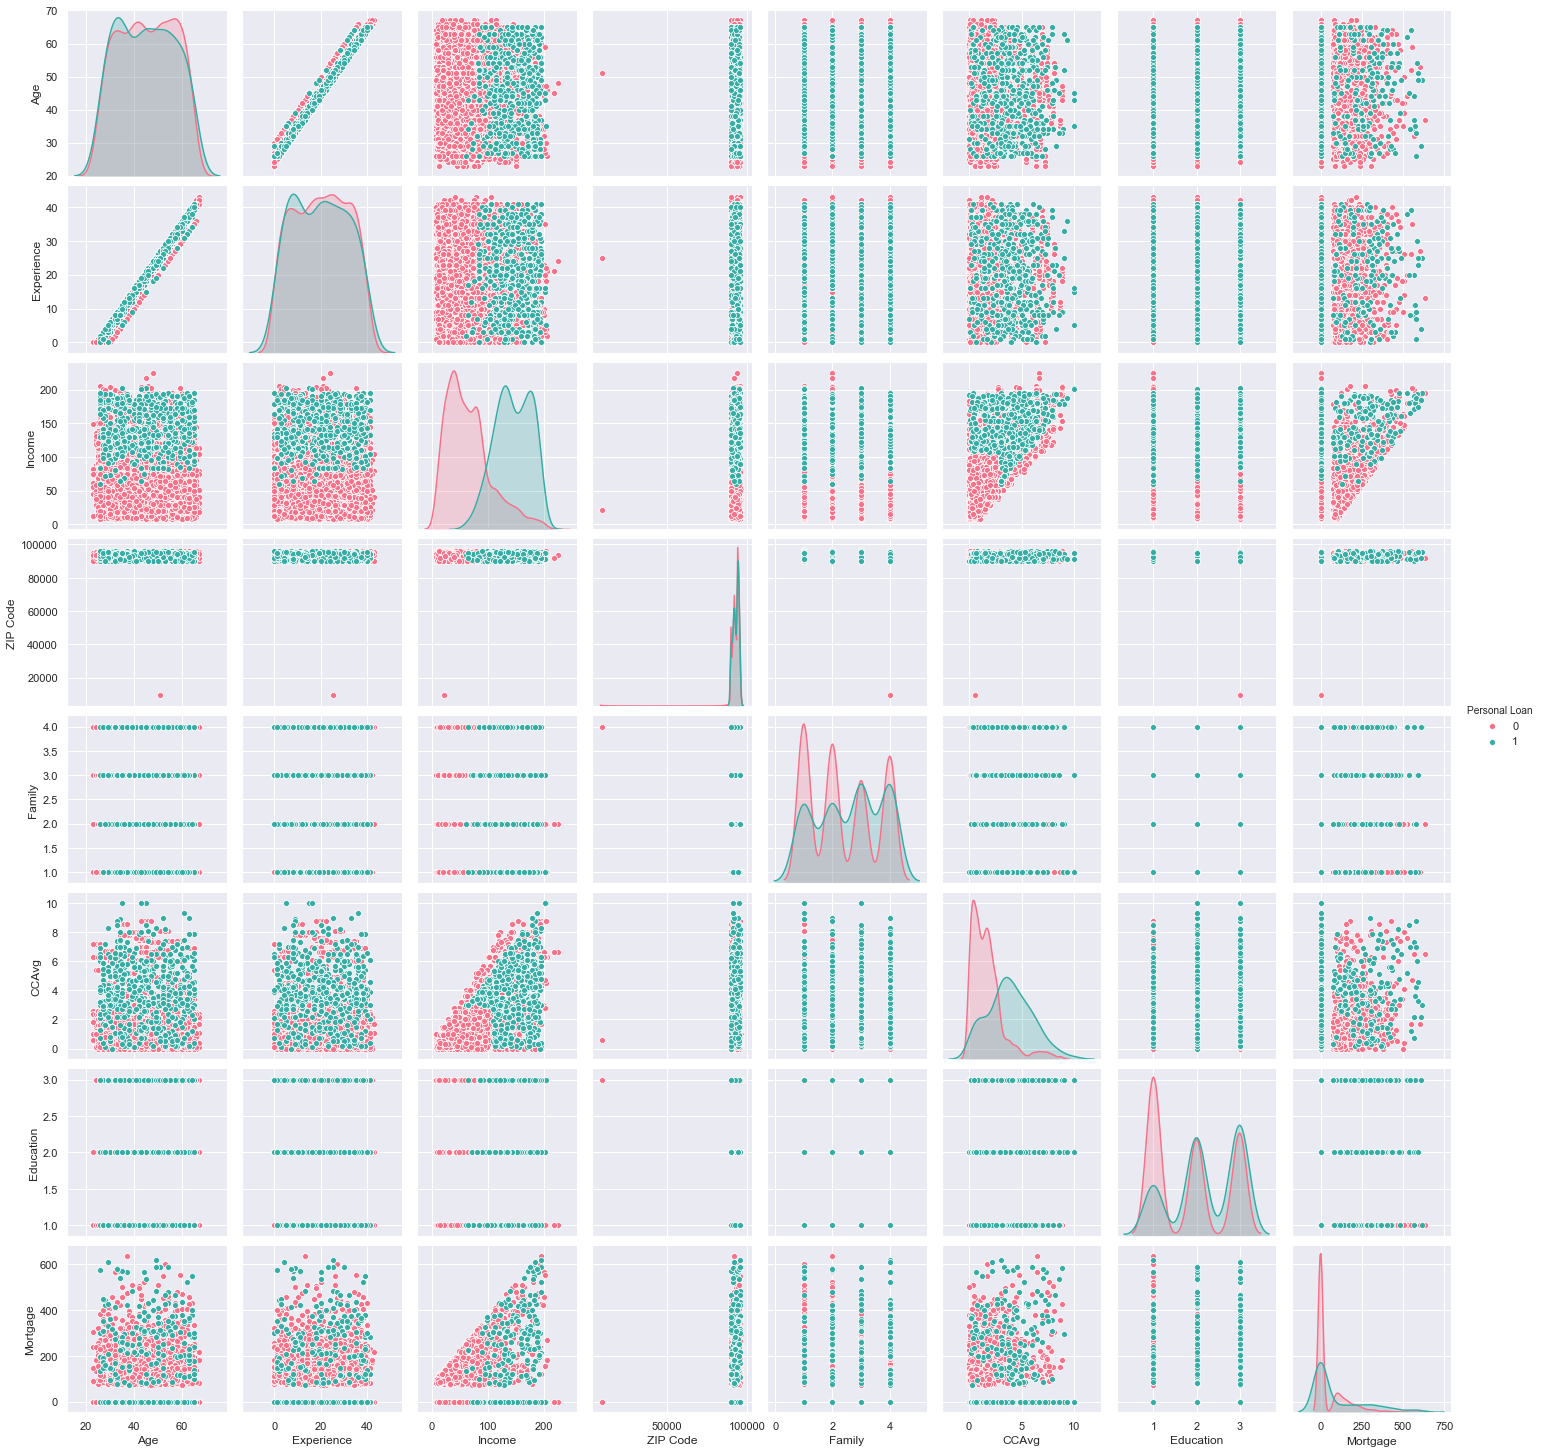

In [14]:
#### Continuous variables
con_data = loan_details.loc[:,'Age':'Mortgage']
con_data['Personal Loan'] = loan_details['Personal Loan']
sns.pairplot(con_data,hue='Personal Loan',palette="husl");

***Inferences:***

- ***Age and Experience have high positive correlation. Older people have more experience***
- ***Income and CCAvg have some correlation. People having higher income are more likely to use their Credit Crads.***
- ***People with higher incomes are more likely to take a Personal Loan.***

### Correlation of attributes

In [15]:
loan_details.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
ID,1.000000,-0.008473,-0.008265,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920
Age,-0.008473,1.000000,0.994198,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539
Experience,-0.008265,0.994198,1.000000,-0.046729,-0.028783,-0.052213,-0.049912,0.013536,-0.010840
Income,-0.017695,-0.055269,-0.046729,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806
ZIP Code,0.013432,-0.029216,-0.028783,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383
Family,-0.016797,-0.046418,-0.052213,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445
CCAvg,-0.024675,-0.052012,-0.049912,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905
Education,0.021463,0.041334,0.013536,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327
Mortgage,-0.013920,-0.012539,-0.010840,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000


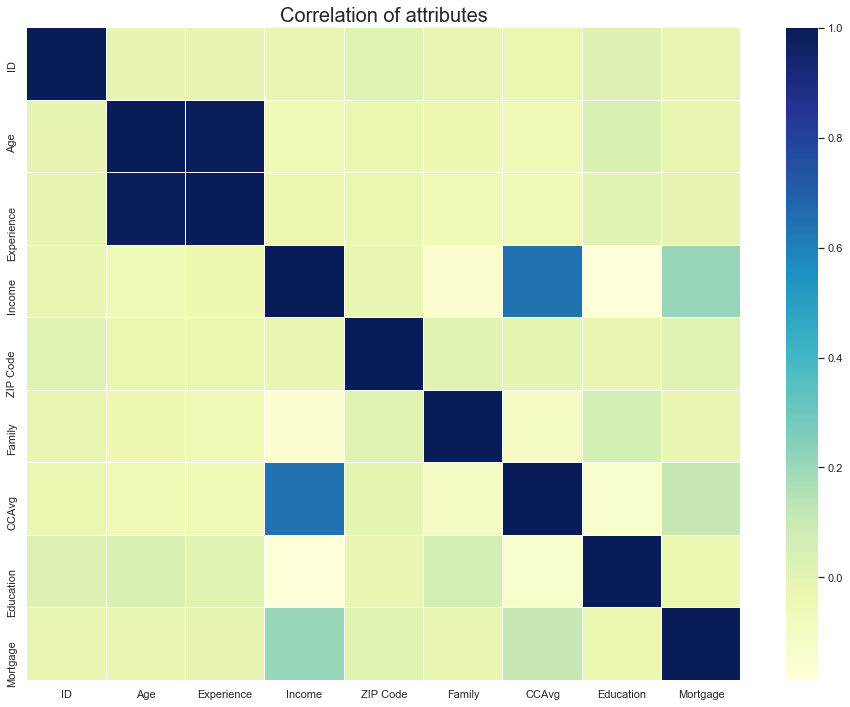

In [16]:
#Heatmap for correlation
plt.figure(figsize=(16,12))
plt.title('Correlation of attributes',size=20)
sns.heatmap(loan_details.corr(),cmap="YlGnBu",linewidths=0.1,linecolor='white');

***The above Correlation matrix somewhat proves the inferences found from pair plot.***|

- ***Age and Experience have high positive correlation.***
- ***Income and CCAvg have high positive correlation.***
- ***Income and Mortgage have low correlation.***

### Target column distribution

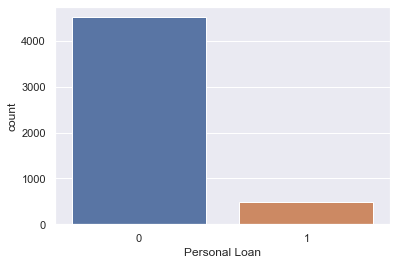

In [17]:
sns.countplot(loan_details['Personal Loan']);

***Proportion of people who have taken a personal loan is very less compared to those who haven't taken the loan.***

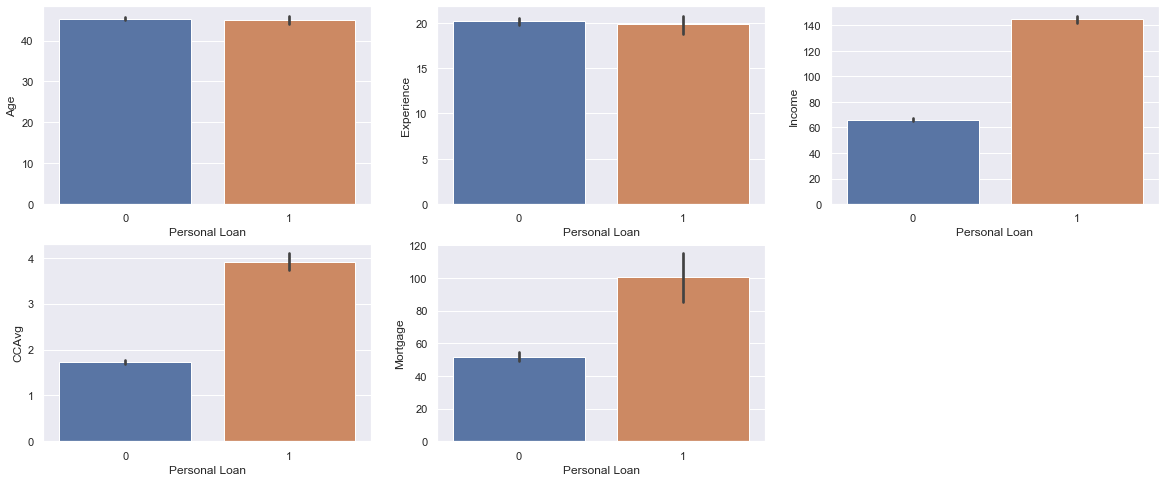

In [18]:
#impact of Continuous features on target variable
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
sns.barplot(loan_details['Personal Loan'], loan_details['Age'], ax=axs[0,0]);
sns.barplot(loan_details['Personal Loan'], loan_details['Experience'], ax=axs[0,1]);
sns.barplot(loan_details['Personal Loan'], loan_details['Income'], ax=axs[0,2]);
sns.barplot(loan_details['Personal Loan'], loan_details['CCAvg'], ax=axs[1,0]);
sns.barplot(loan_details['Personal Loan'], loan_details['Mortgage'], ax=axs[1,1]);
fig.delaxes(axs[1,2])

***Age and Experience do not have much impact on Personal Loan. But on the other hand, Income, CCAvg and Mortgage seem to have an impact on Personal Loan. People with higher Income, CCAvg and Mortgage are more likely to take a Personal Loan.***

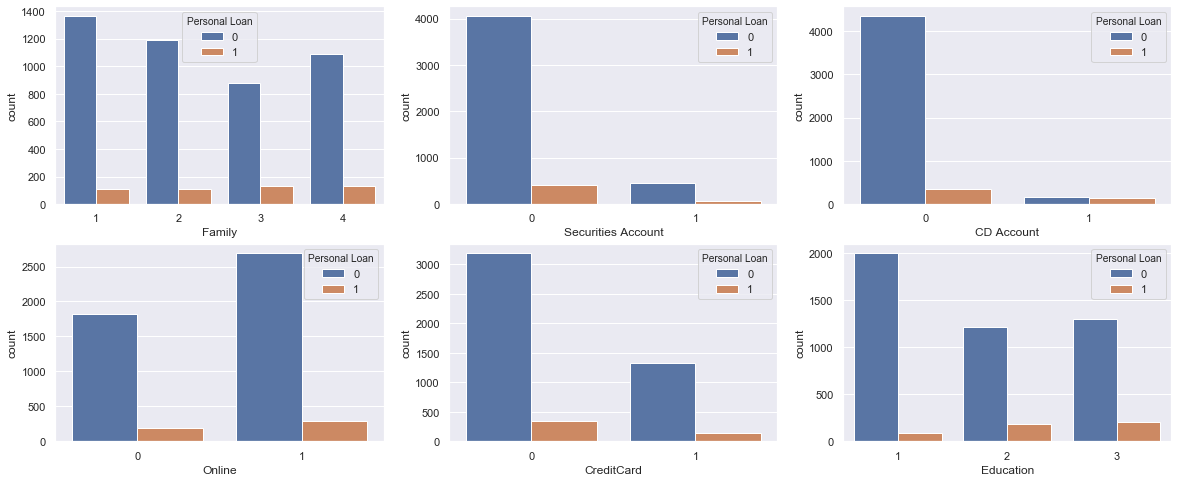

In [19]:
#distribution of target variable with respect to categorical features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,8))
sns.countplot(loan_details['Family'], hue=loan_details['Personal Loan'], ax=axs[0,0]);
sns.countplot(loan_details['Securities Account'], hue=loan_details['Personal Loan'], ax=axs[0,1]);
sns.countplot(loan_details['CD Account'], hue=loan_details['Personal Loan'], ax=axs[0,2]);
sns.countplot(loan_details['Online'], hue=loan_details['Personal Loan'], ax=axs[1,0]);
sns.countplot(loan_details['CreditCard'], hue=loan_details['Personal Loan'], ax=axs[1,1]);
sns.countplot(loan_details['Education'], hue=loan_details['Personal Loan'], ax=axs[1,2]);

***Family Size and Education seem to have a impact on Personal Loan. The higher the family size, the more the chances to take Personal Loan. Similarly, higher the Education, higher the chances to take a Personal Loan. The remaining categorical features do not make much of an impact. People seem to take a Personal Loan irrespective of the existence of Securities and CD Account, Online banking facilities and Credit Card usage.*** 

### Splitting the data into Train and Test set

In [20]:
X = loan_details.drop('Personal Loan', axis=1)
y = loan_details['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

### Using Logistic Regression

In [21]:
reg = LogisticRegression(max_iter=10000)
reg.fit(x_train, y_train)
coeff = reg.coef_
intercept = reg.intercept_
coeff = pd.DataFrame(coeff).T
coeff.index = x_train.columns
print('The coefficients are:',coeff,'\n')
print('The intercept is:',intercept)

The coefficients are:                            0
ID                 -0.000025
Age                 0.048894
Experience         -0.042124
Income              0.038131
ZIP Code           -0.000133
Family              0.749706
CCAvg               0.412307
Education           0.812350
Mortgage            0.001010
Securities Account  0.026259
CD Account          0.227577
Online             -0.009352
CreditCard         -0.003464 

The intercept is: [-0.0052019]


In [22]:
y_pred1 = reg.predict(x_test)
print('Training Accuracy of the Logistic Regression model is:',reg.score(x_train, y_train))
print('Testing Accuracy of the Logistic Regression model is:',accuracy_score(y_test, y_pred1))

Training Accuracy of the Logistic Regression model is: 0.9334285714285714
Testing Accuracy of the Logistic Regression model is: 0.9293333333333333


***Confusion matrix for the Logistic Regression model***

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.73      0.46      0.57       149

    accuracy                           0.93      1500
   macro avg       0.83      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



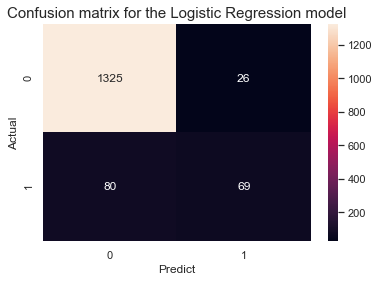

In [23]:
reg_cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(reg_cm,annot=True,fmt='g');
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion matrix for the Logistic Regression model',size=15)
print(classification_report(y_test, y_pred1))

### Using Naive Bayes

In [24]:
#trying to find out the best NB classifier based on score 
nb_arr = [BernoulliNB,GaussianNB,MultinomialNB]
for i in range (len(nb_arr)):
    model = nb_arr[i]()
    model.fit(x_train, y_train)
    print('NB Classifier:',nb_arr[i], '\tScore=',model.score(x_test, y_test))

NB Classifier: <class 'sklearn.naive_bayes.BernoulliNB'> 	Score= 0.8926666666666667
NB Classifier: <class 'sklearn.naive_bayes.GaussianNB'> 	Score= 0.8826666666666667
NB Classifier: <class 'sklearn.naive_bayes.MultinomialNB'> 	Score= 0.7253333333333334


***From the above, we can see that the BernoulliNB classifier has the highest score. So we will use it to build the model.***

In [25]:
nb = BernoulliNB()
nb.fit(x_train, y_train)
y_pred2 = nb.predict(x_test)
print('Training Accuracy of the Naive Bayes model is:',nb.score(x_train, y_train))
print('Testing Accuracy of the Naive Bayes model is:',accuracy_score(y_test, y_pred2))

Training Accuracy of the Naive Bayes model is: 0.8974285714285715
Testing Accuracy of the Naive Bayes model is: 0.8926666666666667


***Confusion matrix for the Naive Bayes classifier***

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1351
           1       0.40      0.15      0.22       149

    accuracy                           0.89      1500
   macro avg       0.65      0.56      0.58      1500
weighted avg       0.86      0.89      0.87      1500



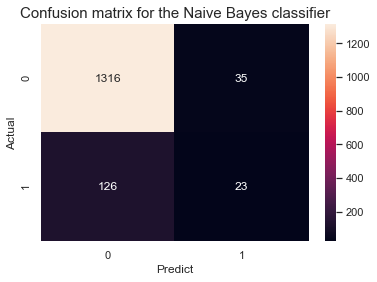

In [26]:
nb_cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(nb_cm,annot=True,fmt='g');
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion matrix for the Naive Bayes classifier',size=15)
print(classification_report(y_test, y_pred2))

### Using K-NN

***Finding out the optimal K value from a list of numbers based on the Misclassification error.***

***Misclassification error (MSE) = 1 - Test accuracy score***

In [27]:
#finding out the best K value
scores = []
arr = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0, arr))
for k in neighbors:
        knn_model = KNeighborsClassifier(n_neighbors = k)
        knn_model.fit(x_train, y_train)
        y_pr = knn_model.predict(x_test)
        scores.append(accuracy_score(y_test,y_pr))
MSE = [1 - x for x in scores]
opt_MSE = min(MSE)
opt_k = neighbors[MSE.index(opt_MSE)]
print('Optimal K value is:',opt_k)

Optimal K value is: 5


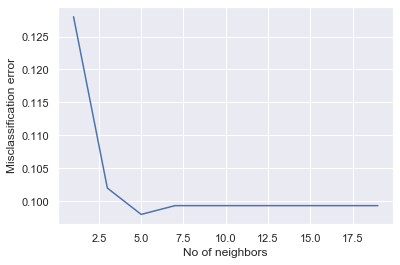

In [28]:
plt.plot(neighbors,MSE)
plt.xlabel('No of neighbors')
plt.ylabel('Misclassification error')
plt.show()

***Building the model using the optimal K value.***

In [29]:
knn = KNeighborsClassifier(n_neighbors=opt_k)
knn.fit(x_train,y_train)
y_pred3 = knn.predict(x_test)
print('Training Accuracy of the KNN model is:',knn.score(x_train, y_train))
print('Testing Accuracy of the KNN model is:',accuracy_score(y_test, y_pred3))

Training Accuracy of the KNN model is: 0.9117142857142857
Testing Accuracy of the KNN model is: 0.902


***Confusion matrix for the K-NN classifier***

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.67      0.03      0.05       149

    accuracy                           0.90      1500
   macro avg       0.78      0.51      0.50      1500
weighted avg       0.88      0.90      0.86      1500



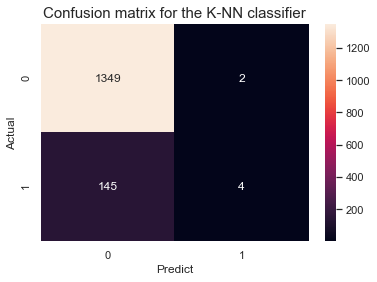

In [30]:
knn_cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(knn_cm,annot=True,fmt='g');
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion matrix for the K-NN classifier',size=15)
print(classification_report(y_test, y_pred3))

### Using SVM

***Finding out the best C and Kernel function.***

In [31]:
c=np.arange(0.1,1.1,0.1)  # Range of C values
kernels=['linear','rbf','sigmoid','poly']  # Range of kernels
# Loop to find the best parameters for C and Kernels
for k in range(len(kernels)):
    for i in range(len(c)):
        svm_model = SVC(C=c[i],kernel=kernels[k])
        svm_model.fit(x_train, y_train)
        print('C=',round(c[i],2),"\tKernel=",kernels[k],'\tScore=',svm_model.score(x_test, y_test))

C= 0.1 	Kernel= linear 	Score= 0.9086666666666666
C= 0.2 	Kernel= linear 	Score= 0.9086666666666666
C= 0.3 	Kernel= linear 	Score= 0.91
C= 0.4 	Kernel= linear 	Score= 0.9146666666666666
C= 0.5 	Kernel= linear 	Score= 0.908
C= 0.6 	Kernel= linear 	Score= 0.9086666666666666
C= 0.7 	Kernel= linear 	Score= 0.9086666666666666
C= 0.8 	Kernel= linear 	Score= 0.9086666666666666
C= 0.9 	Kernel= linear 	Score= 0.9046666666666666
C= 1.0 	Kernel= linear 	Score= 0.9093333333333333
C= 0.1 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.2 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.3 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.4 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.5 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.6 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.7 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.8 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.9 	Kernel= rbf 	Score= 0.9006666666666666
C= 1.0 	Kernel= rbf 	Score= 0.9006666666666666
C= 0.1 	Kernel= sigmoid 	Score= 0.9006666666666666
C= 0.2

***From the above it can be seen that the best C is 0.4 and best kernel is linear. Using these parameters, we will build the model.***

In [32]:
svm = SVC(C=0.4,kernel='linear')
svm.fit(x_train, y_train)
y_pred4 = svm.predict(x_test)
print('Training Accuracy of the SVM model is:',nb.score(x_train, y_train))
print('Testing Accuracy of the SVM model is:',accuracy_score(y_test, y_pred4))

Training Accuracy of the SVM model is: 0.8974285714285715
Testing Accuracy of the SVM model is: 0.9146666666666666


***Confusion matrix for the SVM classifier***

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.63      0.34      0.44       149

    accuracy                           0.91      1500
   macro avg       0.78      0.66      0.70      1500
weighted avg       0.90      0.91      0.90      1500



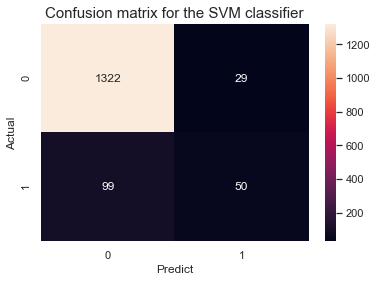

In [33]:
svm_cm = confusion_matrix(y_test, y_pred4)
sns.heatmap(svm_cm,annot=True,fmt='g');
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Confusion matrix for the SVM classifier',size=15)
print(classification_report(y_test, y_pred4))

***Accuracies of the different models are:***

- ***Logistic Regression - 0.9293333333333333***
- ***Naive Bayes - 0.8926666666666667***
- ***K Nearest Neighbor - 0.902***
- ***Support Vector Machine - 0.9146666666666666***

***Recall/Sensitivity of the different models are:***

- ***Logistic Regression - 0.46***
- ***Naive Bayes - 0.15***
- ***K Nearest Neighbor - 0.03***
- ***Support Vector Machine - 0.34***


In [34]:
models = {'Accuracy':[0.9293333333333333,0.8926666666666667,0.902,0.9146666666666666],
          'Sensitivity':[0.46,0.15,0.03,0.34]}
models = pd.DataFrame(models,index=['Logistic Regression','Naive Bayes','K Nearest Neighbor','Support Vector Machine'])
models*100

,Accuracy,Sensitivity
Logistic Regression,92.933333,46.0
Naive Bayes,89.266667,15.0
K Nearest Neighbor,90.200000,3.0
Support Vector Machine,91.466667,34.0


### Conclusion

***From the above, it can be seen that the Logistic Regression model has the highest Accuracy and Sensitivity compared to the other models. Hence, I choose this model for predicting the likelihood of a liability customer buying personal loans.Another advantage with choosing Logistic Regression is that we can easily know the coefficients for each predictor variable. Using these coefficients, we can understand the impact of the various predictor/independant variables on the target variable. The chances of a person taking a personal loan be better understood using these coefficients.***